**MLP (Multi-Layer Perceptron)

In [62]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
#Loading the datasets
df = pd.read_csv('breast_cancer_data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [64]:
# removing unnecessary columns, which are not required for model training
df.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [65]:
# Encoding labels: Convert diagnosis labels: 'M' (malignant) to 1, 'B' (benign) to 0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [66]:
# Separating features and target as X and y
X = df.drop(['diagnosis'], axis=1).values
y = df['diagnosis'].values.reshape(-1, 1)

In [67]:
# # Standardize features to have mean 0 and variance 1
X = (X - X.mean(axis=0)) / X.std(axis=0)
print(X)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


In [68]:
# Split the dataset into train(80%) and test(20%) sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Defining the MLP Class**

In the MLP class we intialize weights and biases and set the parameters.

In [69]:
class MLP:
    # Initializing weights and biases for both layers
    def __init__(self, input_size, hidden_size, output_size, learning_rate):
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))
        self.learning_rate = learning_rate
        self.loss_history = []

    # Forward Pass
    def forward(self, X):
      self.z1 = np.dot(X, self.W1) + self.b1
      self.a1 = relu(self.z1) # Hidden layer
      self.z2 = np.dot(self.a1, self.W2) + self.b2
      self.a2 = sigmoid(self.z2) # Sigmoid Layer
      return self.a2

    # Binary Cross-entropy Loss
    def compute_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        loss = -np.mean(y_true * np.log(y_pred + 1e-8) + (1 - y_true) * np.log(1 - y_pred + 1e-8))
        return loss

    # Backpropogation: Computing gradients and updating weights
    def backward(self, X, y_true, y_pred):
        m = X.shape[0]
        dz2 = y_pred - y_true
        dW2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m

        da1 = np.dot(dz2, self.W2.T)
        dz1 = da1 * relu_derivative(self.z1)
        dW1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m

        # Updating weights and biases
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1

    def train(self, X, y, epochs=100, print_every=10):
      for epoch in range(epochs):
        # Forward pass
        y_pred = self.forward(X)
        # Compute loss
        loss = self.compute_loss(y, y_pred)
        # Store loss for visualization
        self.loss_history.append(loss)
        # Backward pass and parameter update
        self.backward(X, y, y_pred)
        # Print loss at specified intervals
        if (epoch + 1) % print_every == 0 or epoch == 0 or epoch == epochs - 1:
            print(f"Epoch {epoch+1}, Loss: {loss:.6f}", flush=True)

    def predict(self, X):
        y_pred = self.forward(X)
        return (y_pred > 0.5).astype(int)



**Activation Functions**

ReLU is used in the hidden layer for non-linearity, sigmoid in the output for binary classification.

In [74]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

**Model Training and Evaluation**

In [70]:
# Instantiate and train the model
mlp = MLP(input_size=X_train.shape[1], hidden_size=16, output_size=1, learning_rate=0.01)
mlp.train(X_train, y_train, epochs=100)

# Predict and evaluate
y_pred = mlp.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1, Loss: 0.693389
Epoch 10, Loss: 0.691758
Epoch 20, Loss: 0.690027
Epoch 30, Loss: 0.688373
Epoch 40, Loss: 0.686787
Epoch 50, Loss: 0.685262
Epoch 60, Loss: 0.683790
Epoch 70, Loss: 0.682364
Epoch 80, Loss: 0.680974
Epoch 90, Loss: 0.679612
Epoch 100, Loss: 0.678269
Test Accuracy: 0.6228


**Loss Curve Visualization**

This plot shows how the training loss decreases over epochs, indicating learning progress.

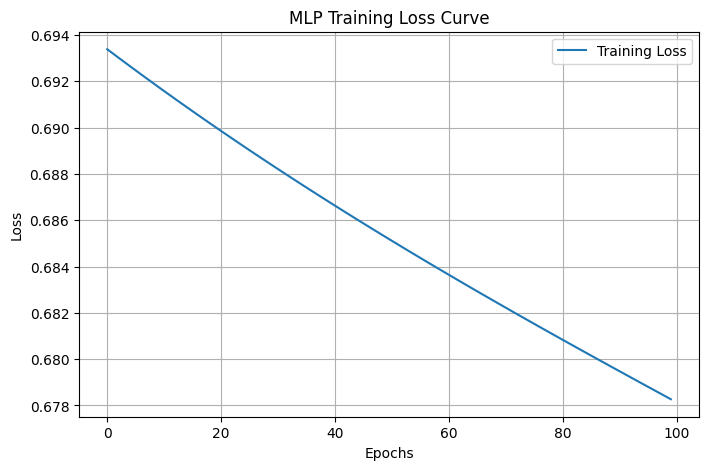

In [71]:
# Visualization: Loss curve
plt.figure(figsize=(8,5))
plt.plot(mlp.loss_history, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('MLP Training Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

Observation:

The loss is decreasing very slowly and remains high (close to 0.69, which is the log-loss for random guessing in binary classification).



**Trainig on different parameters for improving Loss curve**

In [72]:
mlp = MLP(input_size=X_train.shape[1], hidden_size=32, output_size=1, learning_rate=0.01)
loss_history = mlp.train(X_train, y_train, epochs=200)


# Predict and evaluate
y_pred = mlp.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1, Loss: 0.693653
Epoch 10, Loss: 0.691858
Epoch 20, Loss: 0.689948
Epoch 30, Loss: 0.688116
Epoch 40, Loss: 0.686348
Epoch 50, Loss: 0.684633
Epoch 60, Loss: 0.682959
Epoch 70, Loss: 0.681317
Epoch 80, Loss: 0.679691
Epoch 90, Loss: 0.678067
Epoch 100, Loss: 0.676431
Epoch 110, Loss: 0.674765
Epoch 120, Loss: 0.673055
Epoch 130, Loss: 0.671285
Epoch 140, Loss: 0.669433
Epoch 150, Loss: 0.667478
Epoch 160, Loss: 0.665394
Epoch 170, Loss: 0.663147
Epoch 180, Loss: 0.660710
Epoch 190, Loss: 0.658050
Epoch 200, Loss: 0.655126
Test Accuracy: 0.6228


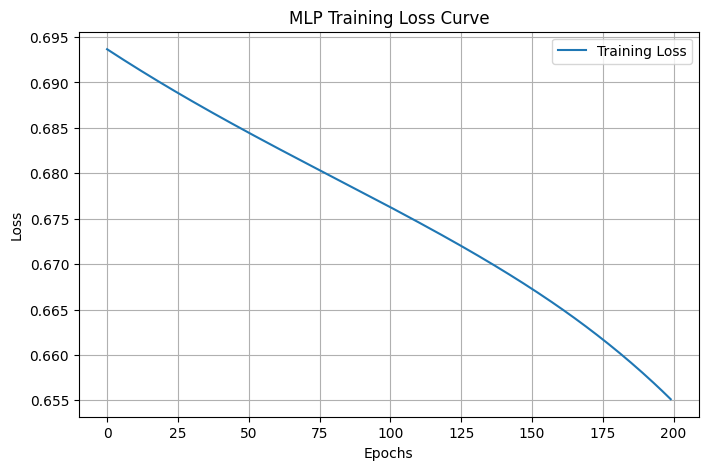

In [73]:
# Visualization: Loss curve
plt.figure(figsize=(8,5))
plt.plot(mlp.loss_history, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('MLP Training Loss Curve')
plt.legend()
plt.grid(True)
plt.show()